# Homework 4: Data Visualization
- **Name**:  [your full name goes here.  remove the brackets.]
- **UB Username**: [your UB username goes here.  remove the brackets]
- **UB Person Number**:  [your UB person number goes here.  remove the brackets]

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [2]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import matplotlib.pyplot as plt
import pandas as pd

% x    float64
 y     float64
dtype: object

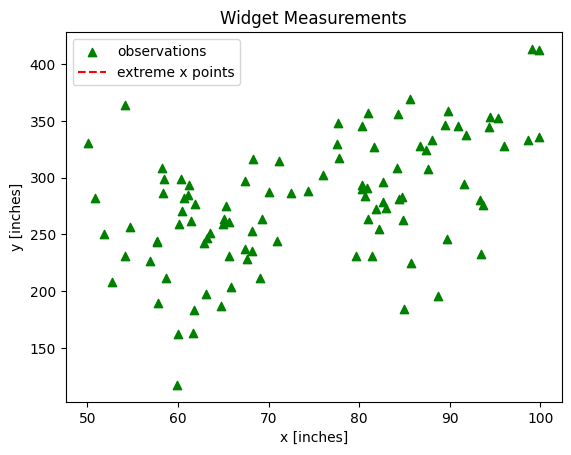

In [4]:
# It's OK to break up your code into multiple cells.
data = pd.read_csv("scatter_data.csv")
data = data[~data.iloc[:,0].astype(str).str.contains('%')] #remove % values from all rows in first column
data = data[~data.iloc[:,1].astype(str).str.contains('%')] #remove % values from all rows in second column
plt.title("Widget Measurements")
plt.ylabel('y [inches]')
plt.xlabel('x [inches]')
plt.scatter(data.iloc[:,0], data.iloc[:,1], marker = "^", color = "green", label = "observations")
# create a horizontal line where the y direction would be the middle point and x values are basically minimum and maximum values of x 
plt.axhline(y = (max(data.iloc[:,1]) - min(data.iloc[:,1]))/2, xmin=min(data.iloc[:,0]), xmax=max(data.iloc[:,0]), color="red", linestyle="--", label="extreme x points")
plt.legend(loc="upper left")



### Problem 2 - Histogram

In [49]:
# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
import matplotlib.pyplot as plt
import pandas as pd

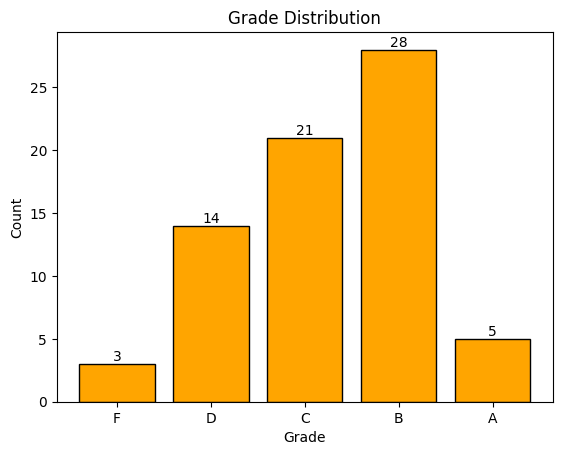

In [117]:
# It's OK to break up your code into multiple cells.
data2 = pd.read_csv("student_grades.csv")
data2 = data2[~data2.iloc[:,0].astype(str).str.contains('%')] #remove % values from all rows in first column
data2 = data2[~data2.iloc[:,1].astype(str).str.contains('%')] #remove % values from all rows in second column
bins = [0, 59.99999, 69.99999, 79.99999, 89.99999, 100.0] # generate bins using a list; 
labels = ['F','D','C','B','A'] # generate corresponding Letter Grades
data2['LG'] = pd.cut(data2.iloc[:,1], bins = bins, labels = labels) # create a new column LG (LetterGrade) using
#                                                                                    # pandas.cut() function to write down the corresponding letter grades for each row

data2df= pd.DataFrame(data2['LG'].value_counts()) # create a new dataframe to store the total number of students within each letter grade
data2df.index.name = 'LG' # Name the index column header as LG
data2df.reset_index(inplace=True)

data2df['LG'] = pd.Categorical(data2df['LG'], categories=labels, ordered=True) #sort the values from F to A
data2df = data2df.sort_values('LG') #sort the values from F to A

plt.title("Grade Distribution")

#set x values as grades, y values as counts using the newly created dataframe, adjust the colors for bins and borders using color and edgecolor parameters
plt.bar(data2df.iloc[:,0], data2df.iloc[:,1], tick_label = data2df.iloc[:,0] , width =0.8, color = "orange", edgecolor = 'black') 
for index, value in enumerate(data2df.iloc[:,1]): #to display the value of each bar
    plt.text(index, value, str(value), ha='center', va='bottom') #adjust horizontal and vertical alignments using for loop
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

Text(0.5, 1.0, 'Distribution of Gaps')

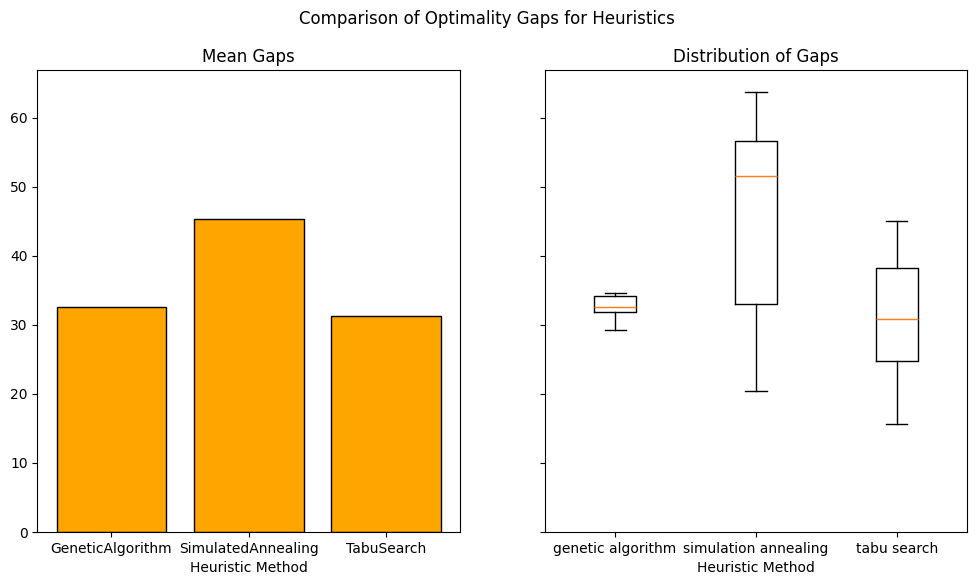

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Use "Code" cells to import libraries, 
# read .csv data, and 
# create your plots.
# ...
data3 = pd.read_csv("solution_data.csv")
data3 = data3[~data3.iloc[:,0].astype(str).str.contains('%')] #remove % values from all rows in first column
data3 = data3[~data3.iloc[:,1].astype(str).str.contains('%')] #remove % values from all rows in second column
data3 = data3[~data3.iloc[:,2].astype(str).str.contains('%')] #remove % values from all rows in third column
d3cols = list(data3) # extract the column names as a separate list
data3df = data3.pivot(index = d3cols[0], columns = d3cols[1], values= d3cols[2]) #using column name indexes, reshape the dataframe and group by index names
data3df.reset_index(inplace=True)
data3df["GeneticAlgorithm"] = ((data3df["optimal"]-data3df["genetic algorithm"])/data3df["optimal"])*100 #create a new column for each problem to calculate average optimality gap for genetic algorithm
data3df["SimulatedAnnealing"] = ((data3df["optimal"]-data3df["simulated annealing"])/data3df["optimal"])*100 #create a new column for each problem to calculate average optimality gap for simulated annealing
data3df["TabuSearch"] = ((data3df["optimal"]-data3df["tabu search"])/data3df["optimal"])*100 #create a new column for each problem to calculate average optimality gap for tabu search
mean_values = data3df[['GeneticAlgorithm', 'SimulatedAnnealing', 'TabuSearch']].mean() #calculate mean values for each method
data3dfmean = pd.DataFrame({'Algorithms': ['GeneticAlgorithm', 'SimulatedAnnealing', 'TabuSearch'], 'Optimality Gaps': mean_values}) #create a dataframe with  heuristic methods and corresponding mean values
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, sharey = True, figsize=(12, 6)) #create the frame for two side-by-side figures, sharing y axis (optimality gap)

fig.suptitle("Comparison of Optimality Gaps for Heuristics")

#set x values as grades, y values as counts using the newly created dataframe, adjust the colors for bins and borders using color and edgecolor parameters
ax1.bar(data3dfmean.iloc[:,0], data3dfmean.iloc[:,1], tick_label = data3dfmean.iloc[:,0], width =0.8, color = "orange", edgecolor = 'black') #generate bar chart
ax1.set_xlabel("Heuristic Method")
ax1.set_title("Mean Gaps")

ax2.boxplot([data3df["GeneticAlgorithm"], data3df["SimulatedAnnealing"], data3df["TabuSearch"]], labels = ["genetic algorithm", "simulation annealing", "tabu search"]) #generate box plots
ax2.set_xlabel("Heuristic Method")
ax2.set_title("Distribution of Gaps")


In [ ]:
# It's OK to break up your code into multiple cells.

--- 
## Part 2 - Explore New Plot Types

With this scatter plot, I used the US Census data to retrieve GDP, Median Age, and Population data of the top 20 countries by GDP in 2021. The purpose of this representation is to demonstrate the influence of population size on GDP per capita and to explore potential correlations between the median age of the countries and their average wealth. I believe this visualization is a useful tool for comparing three different measures without causing confusion. While it is possible to use different colors for the circles to represent additional dimensions, I found it unnecessary in this particular case. As a result, I used a single blue color to maintain clarity in this specific plot. I used 3-digit ISO codes to represent countries.

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
- **URL of Sample Data**:  https://data.census.gov/table?q=United+States&table=DP05&tid=ACSDP1Y2017.DP05&g=010XX00US&lastDisplayedRow=29&vintage=2017&layer=state&cid=DP05_0001E

In [66]:
# Use "Code" cells to create your plots 
# ...
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

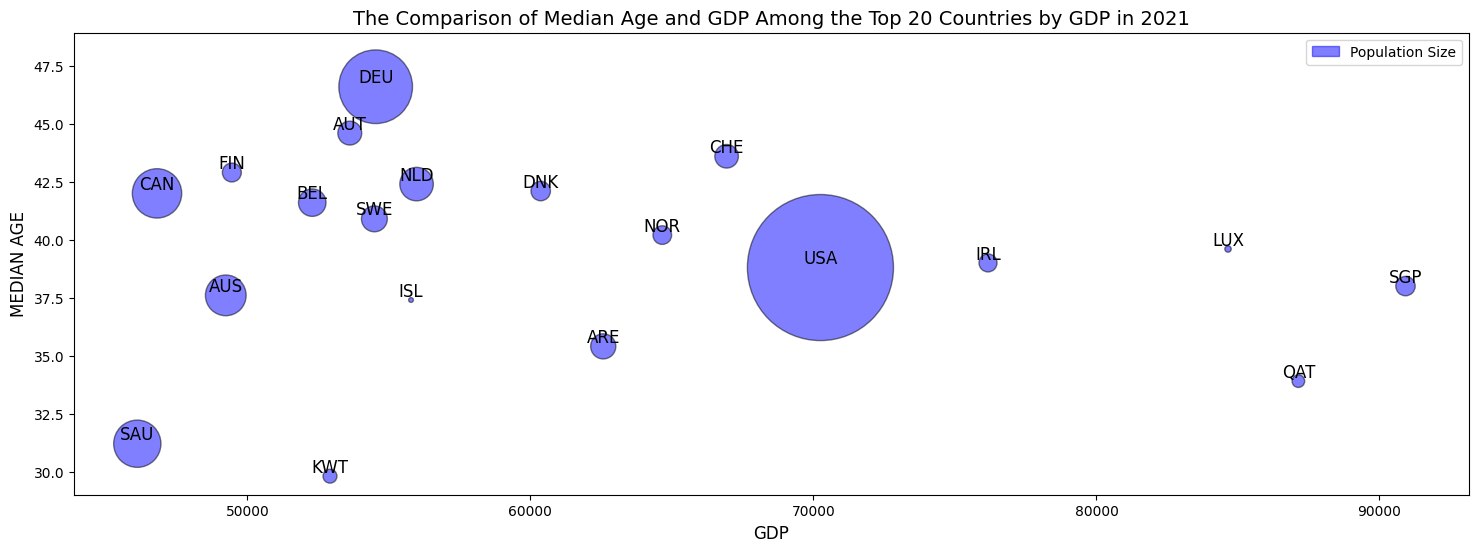

In [73]:
# It's OK to break up your code into multiple cells.
data4 = pd.read_csv("gdp_data.csv") #source: US Census Bureau (2021)


size = data4['population'] / 30000  # You can adjust the scaling factor as needed

# Create the scatter plot
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
plt.scatter(data4['gdp'], data4['medianage'], s=size, alpha=0.5, c='blue', edgecolors='black')

# Set axis labels and a title
plt.xlabel('GDP', fontsize = 12)
plt.ylabel('MEDIAN AGE', fontsize = 12)
plt.title('The Comparison of Median Age and GDP Among the Top 20 Countries by GDP in 2021', fontsize = 14)

# Annotate each point with the country name
for i, txt in enumerate(data4['iso']):
    plt.annotate(txt, (data4['gdp'][i], data4['medianage'][i]), fontsize=12, ha='center', va='bottom')

# Extend the y-axis a little bit
plt.ylim(29, data4['medianage'].max() * 1.05)


# Create a custom legend for population size
legend_circle = mpatches.Circle((0, 0), 10000, color='blue', label='Population Size', alpha=0.5,)
plt.legend(handles=[legend_circle], loc='upper right')

# Show the plot
plt.show()



In [3]:
# It's also OK to include comments, 
# either in Markdown or as Python code comments.